<a href="https://colab.research.google.com/github/contribcode/social_networks_theory_and_practice/blob/master/social_networks_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [0]:
from itertools import combinations

import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

import pandas as pd

import networkx as nx

# graph

In [0]:
graph = pd.read_csv('/content/drive/My Drive/Social Networks/trust.txt',
                    names=['user_1', 'user_2'],
                    delim_whitespace=True)

graph = graph.astype({'user_1': 'int32', 'user_2': 'int32'})

In [3]:
graph.head()

,user_1,user_2
0,9831,19832
1,9831,4247
2,9831,7375
3,9831,15698
4,9831,8604


number of users

In [4]:
users_df = pd.DataFrame()
users_df['user2_list'] = graph.groupby('user_1', sort=False).user_2.apply(list)
users_df['user2_nb'] = users_df.user2_list.apply(len)
users_df.head()

,user2_list,user2_nb
user_1,,
9831,"[19832, 4247, 7375, 15698, 8604, 6823, 4076, 2...",293
5369,"[5493, 12037, 15442, 796, 9222, 9140, 19885, 1...",158
6876,"[9597, 12038, 4874, 20830, 3688, 11561, 8587, ...",113
2760,"[6867, 9738, 21552, 14526, 5323, 9140, 2318, 1...",330
20240,"[4076, 7307, 3635, 798, 19950, 333, 3167, 8406...",300


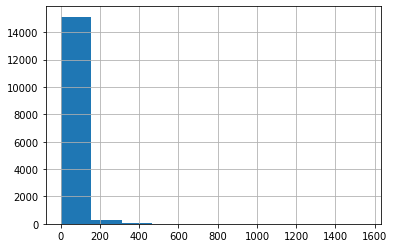

In [5]:
users_df.user2_nb.hist()

In [0]:
users_df.user2_nb.max()

1552

In [0]:
users_df.sort_values(by=['user2_nb'], ascending=False)[:20]

,user2_list,user2_nb
user_1,,
14547,"[21301, 7595, 17694, 20830, 5860, 21722, 20378...",1552
12804,"[21359, 6162, 17485, 5636, 8225, 21863, 9083, ...",1215
14309,"[11936, 15249, 3315, 10885, 17043, 12361, 1135...",999
3426,"[19878, 9071, 21722, 19016, 9248, 7156, 3485, ...",828
19837,"[19837, 15626, 6143, 5095, 20782, 5168, 7149, ...",828
18620,"[19950, 5912, 8604, 4347, 12370, 14325, 16058,...",813
22145,"[12141, 15625, 11496, 3202, 50, 7432, 15234, 1...",745
2742,"[21249, 21007, 12037, 15373, 1567, 13237, 7479...",714
5670,"[10757, 17493, 19672, 1896, 3635, 12783, 15422...",706


In [0]:
graph.user_1.unique().shape

(15449,)

In [0]:
graph.user_2.unique().shape

(15868,)

# weights

In [6]:
rating_with_timestamp = pd.read_csv('/content/drive/My Drive/Social Networks/'
                                    'rating_with_timestamp.txt',
                                    names=['user_id', 
                                           'product_id', 
                                           'category_id', 
                                           'rating',
                                           'helpfulness',
                                           'time_stamp'],
                                    delim_whitespace=True)

rating_df = pd.DataFrame()
rating_df = rating_with_timestamp[['user_id', 'category_id', 'rating']]
rating_df = rating_df.astype({'user_id': 'int32',
                              'category_id': 'int32',
                              'rating': 'int32'})
rating_df.head()

,user_id,category_id,rating
0,1,3,2
1,1,2,2
2,1,3,2
3,1,3,5
4,1,3,3


In [7]:
rating_with_timestamp_test = pd.read_csv('/content/drive/My Drive/Social Networks/'
                                    'rating_timestamp_test.txt',
                                    names=['user_id', 
                                           'product_id', 
                                           'category_id', 
                                           'rating',
                                           'helpfulness',
                                           'time_stamp'],
                                    delim_whitespace=True)

rating_t = pd.DataFrame()
rating_t = rating_with_timestamp_test[['user_id', 'category_id', 'rating']]
rating_t = rating_t.astype({'user_id': 'int32', 
                           'category_id': 'int32', 
                           'rating': 'int32'})
rating_t.head()

,user_id,category_id,rating
0,1,2,2
1,1,3,2
2,1,3,2
3,1,3,5
4,1,3,3


In [0]:
15/4

3.75

In [0]:
rating_t

,user_id,category_id,rating
0,1,2,2
1,1,3,2
2,1,3,2
3,1,3,5
4,1,3,3
5,2,10,5
6,2,10,3
7,2,10,5
8,2,3,3
9,2,3,4


In [78]:
rating_t_gb = rating_t.groupby(['user_id', 'category_id']).mean()
rating_t_gb['rating'] = rating_t_gb.rating.apply(lambda v: round(v, 3))
rating_t_gb

rating
user_id category_id        
1       2             2.000
        3             3.000
2       3             3.750
        5             5.000
        10            4.333
6       3             4.000
        5             5.000
        15            4.833
        17            5.000

In [79]:
rating_t_gb.index

MultiIndex([(1,  2),
            (1,  3),
            (2,  3),
            (2,  5),
            (2, 10),
            (6,  3),
            (6,  5),
            (6, 15),
            (6, 17)],
           names=['user_id', 'category_id'])

In [80]:
# get the values of the first level index (category_id)
category_ids = rating_t_gb.index.get_level_values('category_id')
# set index just to user_id
rating_t_gb.index = rating_t_gb.index.get_level_values(0)
# put the values of the index into a cilumn
rating_t_gb['category_id'] = category_ids
# re-oreder coumn values
rating_t_gb = rating_t_gb[['category_id', 'rating']]
rating_t_gb

,category_id,rating
user_id,,
1,2,2.000
1,3,3.000
2,3,3.750
2,5,5.000
2,10,4.333
6,3,4.000
6,5,5.000
6,15,4.833
6,17,5.000


In [0]:
rt_gb = rating_t_gb.groupby('user_id').apply(lambda r: dict(zip(r['category_id'], r['rating'])))#.reset_index().rename(columns={"id_one":"col a", 0:"col b"})
rat_df = pd.DataFrame(data=rt_gb, columns=['ratings'])
rat_df

In [89]:
rat_df

,ratings
user_id,
1,"{2: 2.0, 3: 3.0}"
2,"{3: 3.75, 5: 5.0, 10: 4.333}"
6,"{3: 4.0, 5: 5.0, 15: 4.833, 17: 5.0}"


In [0]:
def influence_probs(user1_user2, df_ratings):

  infl_dict = dict()
  
  # get users
  user1 = user1_user2[0]
  user2 = user1_user2[1]

  # get ratings
  ratings_user1 = df_ratings.loc[user1].iloc[0]
  ratings_user2 = df_ratings.loc[user2].iloc[0]

  # get categories that have rated
  user1_categories = set(ratings_user1.keys())
  user2_categories = set(ratings_user2.keys())

  common_categories = user1_categories.intersection(user2_categories)

  # if there are no common categories then there is no influence
  if len(common_categories) == 0:
    return infl_dict

  # avoid division by zero
  eps = 1e-09

  # denominator
  denom = 0
  for cc in common_categories:
    user1_rating = ratings_user1[cc]
    user2_rating = ratings_user2[cc]
    denom += abs(user1_rating - user2_rating)
  denom += eps
  denom = 1.0 / denom

  # categories of both user_1 and user_2
  categories = user1_categories.union(user2_categories)
  # compute influence probability for every category
  for c in categories:
    if c in user1_categories:
      usr1_rating = ratings_user1[c]
    else:
      usr1_rating = 0
    if c in user2_categories:
      usr2_rating = ratings_user2[c]
    else:
      usr2_rating = 0
    numer = abs(usr1_rating - usr2_rating)
    numer += eps
    numer = 1.0 / numer
    res = round(numer / denom, 3)
    infl_dict[c] = res

  return infl_dict

In [142]:
l = list(combinations(rat_df.index.tolist(), 2))
s = pd.Series(l)
test_df = pd.DataFrame(data=s, columns=['user1_user2'])
test_df['influence_probabilities'] = test_df.apply(lambda r: influence_probs(r.user1_user2, rat_df), axis=1)
test_df.head()

,user1_user2,influence_probabilities
0,"(1, 2)","{2: 0.375, 3: 1.0, 5: 0.15, 10: 0.173}"
1,"(1, 6)","{17: 0.2, 2: 0.5, 3: 1.0, 5: 0.2, 15: 0.207}"
2,"(2, 6)","{17: 0.05, 3: 1.0, 5: 250000001.0, 10: 0.058, ..."


In [133]:
rat_df

,ratings
user_id,
1,"{2: 2.0, 3: 3.0}"
2,"{3: 3.75, 5: 5.0, 10: 4.333}"
6,"{3: 4.0, 5: 5.0, 15: 4.833, 17: 5.0}"


In [136]:
.2/1.33

0.15037593984962405